# Item-based Filtering based on Movie
### Based on https://www.kaggle.com/johnwill225/movie-recommendations
### As inspiration and start for further developments

In [9]:
import pandas as pd
import numpy as np

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
movies = pd.read_csv('../data/raw/movies.csv', sep=',')
ratings = pd.read_csv('../data/raw/ratings.csv', sep=',')

In [11]:
ratings.head()

,user_id,movieID,rating
0,1264,2363,3.5
1,213,8368,2.5
2,593,64032,3.0
3,609,54995,4.0
4,1590,5005,4.0


In [12]:
movies.head()

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995.0,toy_story,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995.0,1068044-jumanji,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993.0,grumpy_old_men,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995.0,waiting_to_exhale,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995.0,father_of_the_bride_part_ii,http://content8.flixster.com/movie/25/54/25542...


In [13]:
movies = movies.rename(columns = {'id':'movieID'})

In [16]:
final_dataset = ratings.pivot(index='movieID',columns='user_id',values='rating')

In [17]:
final_dataset.fillna(0,inplace=True)

In [19]:
no_user_voted = ratings.groupby('movieID')['rating'].agg('count')
no_movies_voted = ratings.groupby('user_id')['rating'].agg('count')

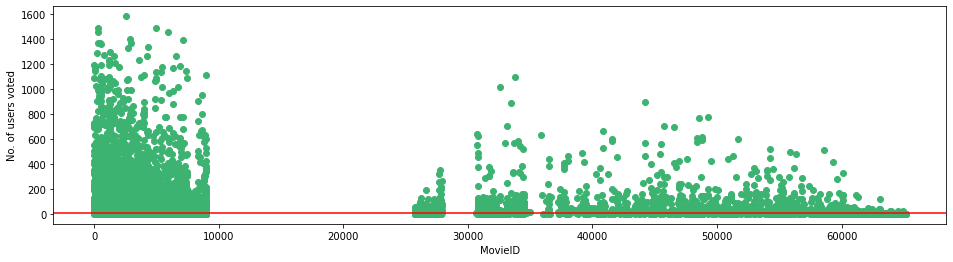

In [20]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieID')
plt.ylabel('No. of users voted')
plt.show()

In [21]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

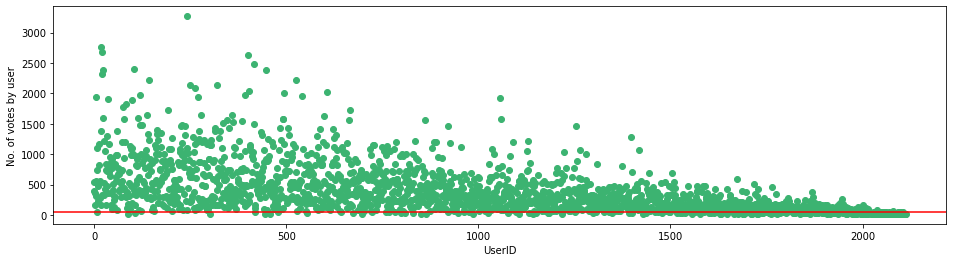

In [22]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserID')
plt.ylabel('No. of votes by user')
plt.show()

In [23]:
final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]

user_id,0,1,2,3,4,5,6,7,8,10,...,2010,2011,2013,2015,2031,2038,2045,2080,2094,2099
movieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.5,3.5,1.0,4.5,0.0,3.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0
2,3.0,4.0,0.0,0.0,2.5,0.0,0.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,3.5,0.0,4.5,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [25]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [26]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [27]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [28]:
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [33]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 20
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieID']
        movie_idx = final_dataset[final_dataset['movieID'] == movie_idx].index[0]
        
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),\
                               key=lambda x: x[1])[:0:-1]
        
        recommend_frame = []
        
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieID']
            idx = movies[movies['movieID'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    
    else:
        
        return "No movies found. Please check your input"

In [36]:
get_movie_recommendation('Iron Man')

,Title,Distance
1,Children of Men,0.521326
2,Superbad,0.519208
3,Ratatouille,0.518881
4,Spider-Man,0.518404
5,Hot Fuzz,0.514845
6,V for Vendetta,0.508133
7,Transformers,0.503521
8,The Departed,0.499212
9,The Prestige,0.495691
10,Juno,0.492629


In [37]:
get_movie_recommendation('The Dark Knight')

,Title,Distance
1,There Will Be Blood,0.504684
2,Superbad,0.501706
3,El laberinto del fauno,0.499285
4,Sin City,0.496073
5,Fight Club,0.495468
6,Children of Men,0.490372
7,The Matrix,0.486861
8,The Bourne Ultimatum,0.476397
9,I Am Legend,0.474811
10,Juno,0.471222
